Q1. How representative is this passenger list of the entire set of passengers on the RMS Titanic?

In [1]:
## Create a Pandas DataFrame from the titanic_data.csv
import numpy as np
import pandas as pd

filename = 'titanic_data.csv'
passengers_df = pd.read_csv(filename)

passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Q1. How representative is this passenger list compared with the entire set of passengers on the RMS Titanic?

In [2]:
# This code groups the passenger data by survivor status ('Survived' = 1) and non-survivor ('Survived' = 0)
# and counts the number of occurrences of each.

survivors_vs_nonsurvivors = passengers_df.groupby('Survived')['Survived'].count()

print survivors_vs_nonsurvivors

Survived
0    549
1    342
Name: Survived, dtype: int64


Per historic record the percentage of survivors among the total passengers onboard the Titanic was approx. 724/2224 = 33%

The data in our titanic_data.csv file yields the percentage of survivors to be approx. 342/(342 + 549) = 38%

Conclusion: It appears that our sample of Titanic passengers is fairly representative of the total set of passengers onboard

Q2. What was the likelihood for female passengers to survive as compared with male passengers?

In [3]:
# This code groups the passenger data by gender and then by survivor status subgroups;
# then counts the number of occurences of each subgroup.

female_vs_male = passengers_df.groupby(['Sex', 'Survived'])['Sex'].count()

print female_vs_male

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64


Our sample file of Titanic passengers yields the following results with regard to likelihood of survival for females vs males:

The likelihood of survival for female passengers was 233/(233 + 81) = 74%, whereas the likelihood of survival for male passengers was 109/(109 + 468) = 19%

Q3. What was the likelihood for children (those less than 13 yrs. old) to survive as compared to adults?

In [4]:
# This code adds a boolean column to the DataFrame named 'Child', which categorizes the sample passenger data by age:
# child (< 13) = True or False, then the code groups the data into subgroups combining age category & survivor status;
# then counts the occurences of each subgroup.

passengers_df['Child'] = np.where(passengers_df['Age'] <= 12, 'True', 'False')

child_vs_adult = passengers_df.groupby(['Child', 'Survived'])['Child'].count()

print child_vs_adult

Child  Survived
False  0           520
       1           302
True   0            29
       1            40
Name: Child, dtype: int64


Our sample file of Titanic passengers yields the following results with regard to the likelihood of survival for children vs adults:

The likelihood of survival for child passengers was 40/(40 + 29) = 58%, whereas the likelihood of survival for adult passengers was 302/(302 + 520) = 37%

Q4. What was the likelihood for upper-class (1st class) passengers to survive as compared to other passengers?

In [5]:
# This code adds a boolean column to the DataFrame named 'Uclass', which divides passenger classes into upper-class
# where(Pclass = 1 = True) & other classes (Pclass = 2 or 3 = False). The Uclass column is unnecessary for purposes
# of counting each class, but is useful for simplifying the bar chart since my question is focused on the likelihood 
# of survival for upper-class passengers.

passengers_df['Uclass'] = np.where(passengers_df['Pclass'] == 1, 'True', 'False')

upper_class_vs_other_classes = passengers_df.groupby(['Uclass', 'Survived'])['Uclass'].count()

# This code segments counts for female and male passengers among the upper-class to understand the significance of
# the female component with respect to likelihood of survival.

upper_class_vs_other_classes_sex = passengers_df.groupby(['Uclass', 'Survived', 'Sex'])['Uclass'].count()

print upper_class_vs_other_classes
print upper_class_vs_other_classes_sex

Uclass  Survived
False   0           469
        1           206
True    0            80
        1           136
Name: Uclass, dtype: int64
Uclass  Survived  Sex   
False   0         female     78
                  male      391
        1         female    142
                  male       64
True    0         female      3
                  male       77
        1         female     91
                  male       45
Name: Uclass, dtype: int64


Our sample file of Titanic passengers yields the following results with regard to likelihood of survival for upper-class (Pclass = 1) passengers vs passengers travelling in other classes:

The likelihood of survival for upper-class passengers was 136/(136 + 80) = 63%, whereas the likelihood of survival for other classes of passengers was 206/(206 + 469) = 31%

The percentage of females in upper-class was (91 + 3)/(136 + 80) = 44%, whereas the percentage of females for entire data sample was (233 + 81)/891 = 35% 

Q5. Can graphical representations of our sample data for the various categories of survivors vs. non-survivors provide additional insights?

Populating the interactive namespace from numpy and matplotlib


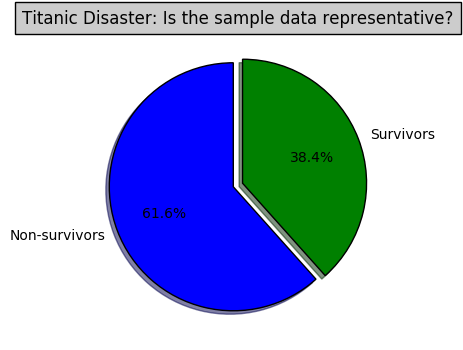

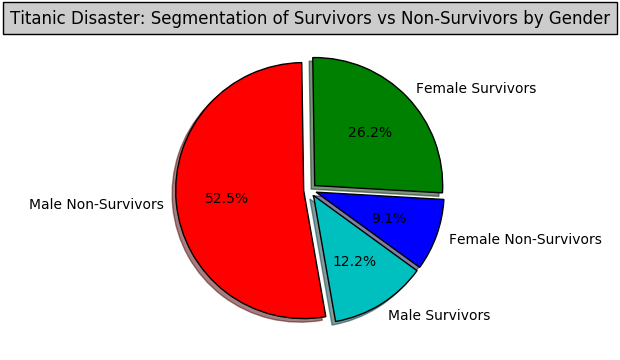

In [6]:
import matplotlib.pyplot as plt

%pylab inline
figure(1, figsize=(4,4))
# ax = axes([0.1, 0.1, 0.8, 0.8])

labelsQ1 = 'Non-survivors' , 'Survivors'
labelsQ2 = 'Female Non-Survivors' , 'Female Survivors' , 'Male Non-Survivors' , 'Male Survivors'
explodeQ1=(0.04, 0.04)
explodeQ2=(0.05, 0.05, 0.05, 0.05);
# axis('equal');

pie(survivors_vs_nonsurvivors, explode=explodeQ1, labels=labelsQ1,
                autopct='%1.1f%%', shadow=True, startangle=90)
title('Titanic Disaster: Is the sample data representative?', bbox={'facecolor':'0.8', 'pad':5})
show()

figure(2, figsize=(4,4))
ax = axes([0.1, 0.1, 0.8, 0.8])

pie(female_vs_male, explode=explodeQ2, labels=labelsQ2,
                autopct='%1.1f%%', shadow=True, startangle=-36)
title('Titanic Disaster: Segmentation of Survivors vs Non-Survivors by Gender', bbox={'facecolor':'0.8', 'pad':5})
show()

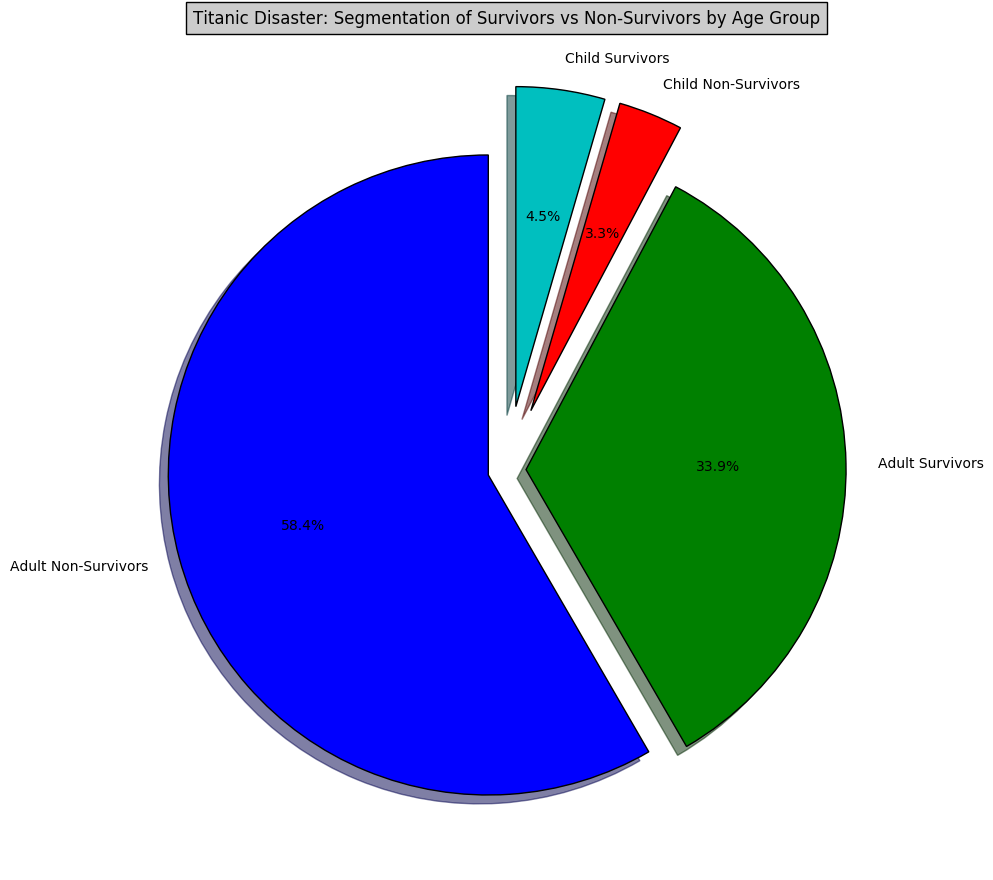

In [7]:
figure(3, figsize=(10,10))
ax = axes([0.1, 0.1, 0.8, 0.8])

labelsQ3 = 'Adult Non-Survivors' , 'Adult Survivors' , 'Child Non-Survivors' , 'Child Survivors'
explodeQ3=(0.06, 0.06, 0.2, 0.2)

pie(child_vs_adult, explode=explodeQ3, labels=labelsQ3,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Titanic Disaster: Segmentation of Survivors vs Non-Survivors by Age Group', bbox={'facecolor':'0.8', 'pad':5}, y= 1.05)
show()

The following plot is intended to understand the significance of the female component in the upper-class passenger category with respect to likelihood of survival

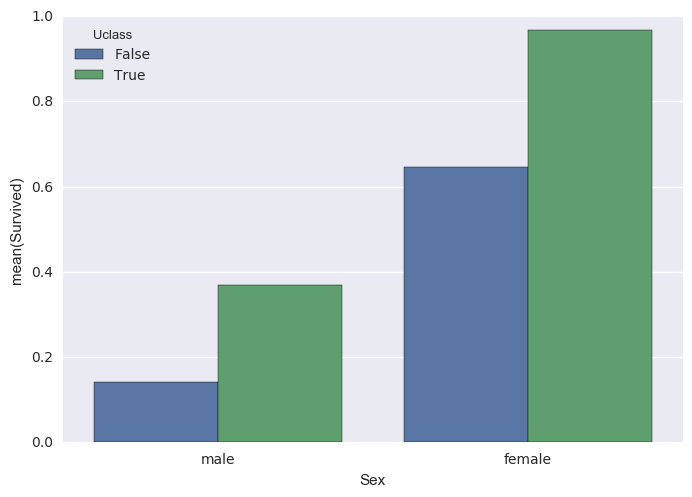

In [8]:
# This plot will be coupled with results from Pandas GroupBy object:
# upper_class_vs_other_classes_sex = passengers_df.groupby(['Uclass', 'Survived', 'Sex'])['Uclass'].count()
# to understand the heights of each bar (combined resulta are incorporated within the analysis report)

import seaborn as sns

sns.barplot(x='Sex', y='Survived', hue='Uclass', ci=None, data=passengers_df)